# Assignement n.4

Collect the ABALONE Dataset from [here](https://archive.ics.uci.edu/ml/datasets/Abalone).

You'll get 2 files:
   * abalone.data  : csv for the dataset
   * abalone.names : explanation and names of the attributes.
   
## GOALS:

  1. Provide basic data exploration results on the dataset
  2. Train a binary classifier on the Abalone dataset for the following target classes:
      * 0: young snail, number of rings <= 12
      * 1: old snail, number of rings > 12

### Notes:

  * Use 70-30 as train-test split
  * Try different classifiers and compare the results
  * Provide an evaluation of the classifier
  * *Optional* Tune the classifier's hyperparameters
  * Comment with markdown cells everything you code

#### Name: Ufuk Cem Birbiri
##### Data Science & AI MSc

# PART-1: Data Exploration


There are explanations in Markdown cells and also some comments between some lines

- Import necessary librariesand read the data:

In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Read the data and create a dataFrame with column names
df= pd.read_csv("abalone.data", header=0,
                names=["Sex","Length","Diameter", "Height","Whole weight","Shucked weight","Viscera weight","Shell weight","Rings"])
df.head()


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


- Add the target column. If the number of rings is smaller or equal than 12, it's target is in class 0. Otherwise class 1:

In [242]:
df['target_class'] = np.where(df['Rings']<= 12, 0, 1)
#Check the result:
df[df.Rings>12].head()
#df[df.Rings<=12].head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,target_class
5,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20,1
6,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16,1
8,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19,1
9,F,0.525,0.380,0.140,0.6065,0.1940,0.1475,0.210,14,1
27,M,0.605,0.475,0.180,0.9365,0.3940,0.2190,0.295,15,1


- Show the number of data points in each class:

In [243]:
df['target_class'].value_counts()

0    3484
1     692
Name: target_class, dtype: int64

In [244]:
#This is the same thing with above cell
df.groupby('target_class').size()

target_class
0    3484
1     692
dtype: int64

<AxesSubplot:xlabel='target_class', ylabel='Count'>

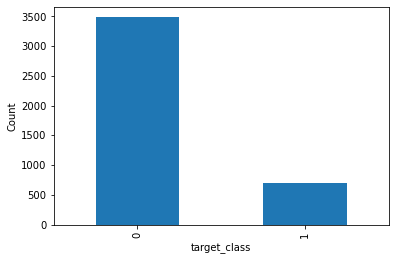

In [245]:
#Or we can show it with a bar plot:
counts = df.groupby('target_class').size()
counts.plot(kind='bar', ylabel="Count")

In [246]:
#See the shape of the dataFrame:
df.shape

(4176, 10)

In [247]:
#Get some info:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4176 non-null   object 
 1   Length          4176 non-null   float64
 2   Diameter        4176 non-null   float64
 3   Height          4176 non-null   float64
 4   Whole weight    4176 non-null   float64
 5   Shucked weight  4176 non-null   float64
 6   Viscera weight  4176 non-null   float64
 7   Shell weight    4176 non-null   float64
 8   Rings           4176 non-null   int64  
 9   target_class    4176 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 326.4+ KB


In [248]:
#Let's get some statistical info such as mean, std, min or max values:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,target_class
count,4176.000000,4176.000000,4176.000000,4176.000000,4176.00000,4176.000000,4176.000000,4176.000000,4176.000000
mean,0.524009,0.407892,0.139527,0.828818,0.35940,0.180613,0.238852,9.932471,0.165709
std,0.120103,0.099250,0.041826,0.490424,0.22198,0.109620,0.139213,3.223601,0.371864
min,0.075000,0.055000,0.000000,0.002000,0.00100,0.000500,0.001500,1.000000,0.000000
25%,0.450000,0.350000,0.115000,0.441500,0.18600,0.093375,0.130000,8.000000,0.000000
50%,0.545000,0.425000,0.140000,0.799750,0.33600,0.171000,0.234000,9.000000,0.000000
75%,0.615000,0.480000,0.165000,1.153250,0.50200,0.253000,0.329000,11.000000,0.000000
max,0.815000,0.650000,1.130000,2.825500,1.48800,0.760000,1.005000,29.000000,1.000000


- Let's see some information about Rings because the target classes are determined by the number of rings. This information will give us some knowledge about the distribution of the data:

In [249]:
df['Rings'].describe()

count    4176.000000
mean        9.932471
std         3.223601
min         1.000000
25%         8.000000
50%         9.000000
75%        11.000000
max        29.000000
Name: Rings, dtype: float64

- Let's plot the dataset with different plots. Let's start with density:

<AxesSubplot:ylabel='Density'>

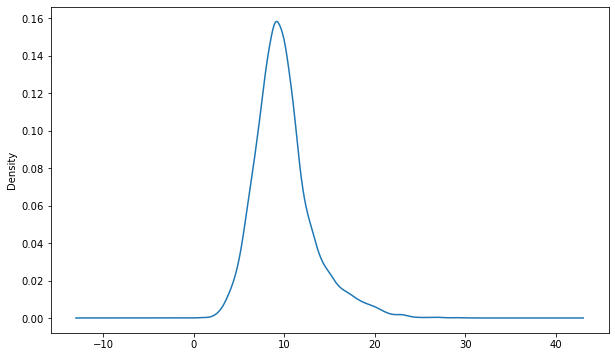

In [250]:
df['Rings'].plot(kind='density', figsize=(10, 6))


- Let's plot the mean and median in the same plot:

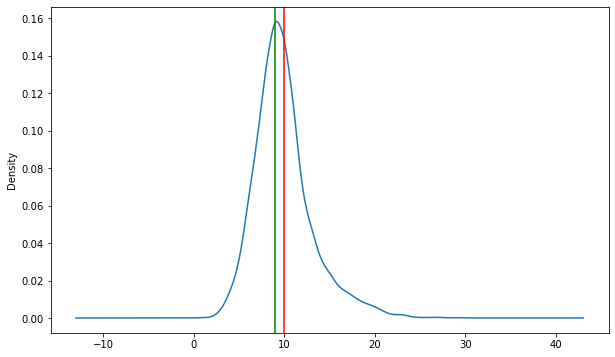

In [251]:
ax = df['Rings'].plot(kind='density', figsize=(10, 6))
ax.axvline(df['Rings'].mean(), color='red')
ax.axvline(df['Rings'].median(), color='green')

- No surprize since we did see before that the mean is 9.93.It is good that we can see also median.

- We can also plot box plot to observe outliers:

<AxesSubplot:>

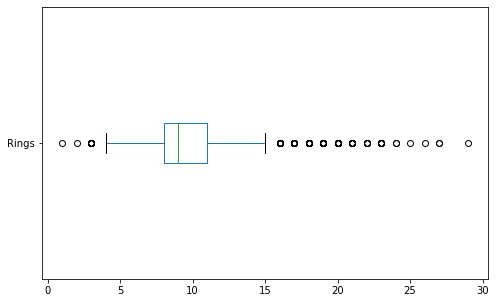

In [252]:
df['Rings'].plot(kind='box', vert=False, figsize=(8, 5))



- Now let's plot histogram:

Text(0.5, 0, 'Number of rings')

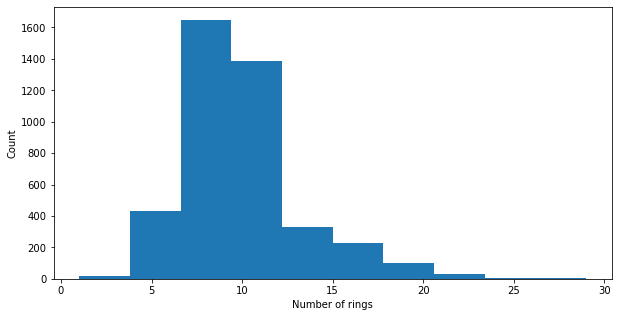

In [253]:
ax = df['Rings'].plot(kind='hist', figsize=(10, 5))
ax.set_ylabel('Count')
ax.set_xlabel('Number of rings')

- Now, let's plot other features in the DataFrame such as sex:

In [254]:
#First, show the number of instances for each sex:
df['Sex'].value_counts()

M    1527
I    1342
F    1307
Name: Sex, dtype: int64

- It seems that sex values are (almost) equal. To prove that,make a pie plot:  

<AxesSubplot:ylabel='Sex'>

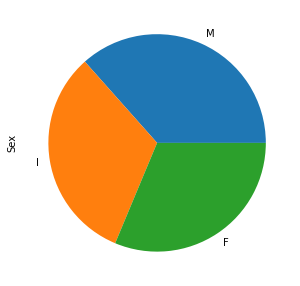

In [255]:
df['Sex'].value_counts().plot(kind='pie', figsize=(5,5))

- We can also make a bar plot to see the number of data points per each sex:

Text(0, 0.5, 'Number of instances')

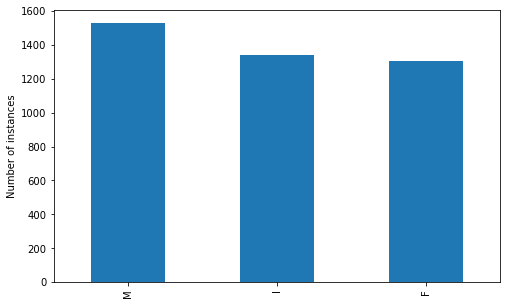

In [256]:
ax = df['Sex'].value_counts().plot(kind='bar', figsize=(8,5))
ax.set_ylabel('Number of instances')

- Now, let's see the distribution of sex among each class:

Text(0.5, 0, 'Old snails')

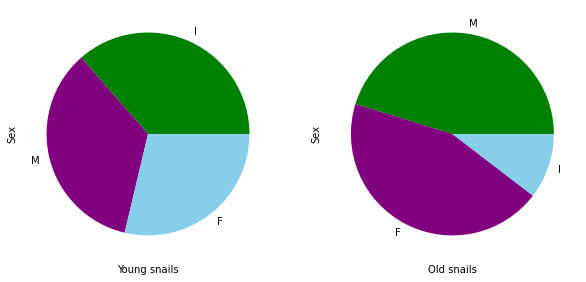

In [257]:
df_young = df[df.Rings<=12] #Young snails
df_old = df[df.Rings>12] #Old snails

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,10))  # 1 row, 2 columns

df_young['Sex'].value_counts().plot(kind='pie', figsize=(10,10),ax=ax1,colors = ['green', 'purple',"skyblue"])
df_old['Sex'].value_counts().plot(kind='pie', figsize=(10,10),ax=ax2,colors = ['green', 'purple',"skyblue"])
ax1.set_xlabel('Young snails')
ax2.set_xlabel('Old snails')

- It is interesting to see that infants(I) are less in old snails.

- It is time to see the correlation matrix. Wecan understand which features are related(dependent) to each other with this matrix:

In [258]:
corr = df.corr()
corr

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,target_class
Length,1.000000,0.986813,0.827552,0.925255,0.897905,0.903010,0.897697,0.557123,0.230212
Diameter,0.986813,1.000000,0.833705,0.925452,0.893159,0.899726,0.905328,0.575005,0.250403
Height,0.827552,0.833705,1.000000,0.819209,0.774957,0.798293,0.817326,0.558109,0.285005
Whole weight,0.925255,0.925452,0.819209,1.000000,0.969403,0.966372,0.955351,0.540818,0.264993
Shucked weight,0.897905,0.893159,0.774957,0.969403,1.000000,0.931956,0.882606,0.421256,0.147372
Viscera weight,0.903010,0.899726,0.798293,0.966372,0.931956,1.000000,0.907647,0.504274,0.235973
Shell weight,0.897697,0.905328,0.817326,0.955351,0.882606,0.907647,1.000000,0.628031,0.358457
Rings,0.557123,0.575005,0.558109,0.540818,0.421256,0.504274,0.628031,1.000000,0.762623
target_class,0.230212,0.250403,0.285005,0.264993,0.147372,0.235973,0.358457,0.762623,1.000000


###### Comment on correlation matrix:
- If a value is high in a cell in the matrix, it means that these two features are highly correlated. For example, Length and Diameter are correlated to each other with 0.986813.
- If the value is low, that means these features are independent and do not affect each other. For example Rings and Shucked weight.
- The matrix is symmetric.
- The diagonal is always 1 because the correlation for each feature to itself is 1.
- We see that the target_class's most effective correlated feature is Rings(0.762623). That is true because we created target_class according to Rings.

- We can see the correlation better if we use heatmap:

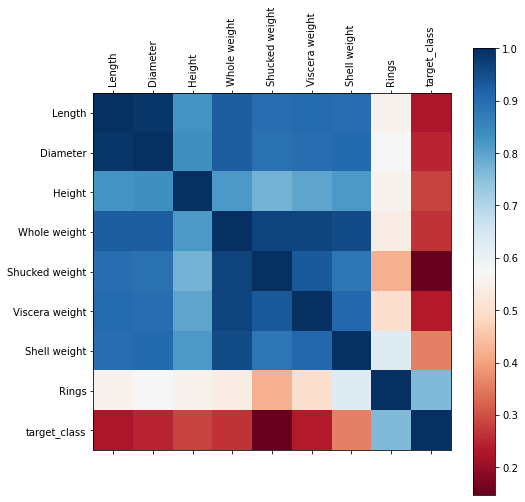

In [259]:
fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns)
cb = plt.colorbar()

In [260]:
#To remeber the dataFrame:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,target_class
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,0


- Let's see the scatter plot of Sex and Rings:

<AxesSubplot:xlabel='Sex', ylabel='Rings'>

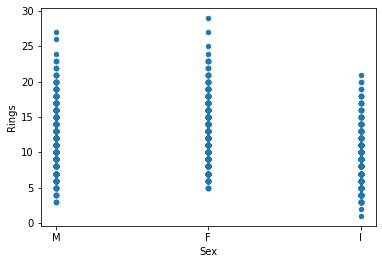

In [261]:
df.plot(kind='scatter', x='Sex', y='Rings')

- See the scatter plot of Height and Rings:

<AxesSubplot:xlabel='Height', ylabel='Rings'>

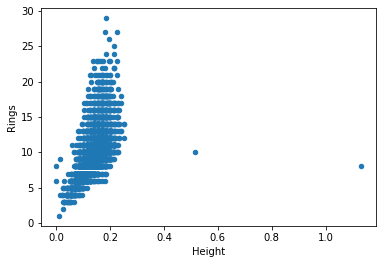

In [262]:
df.plot(kind='scatter', x='Height', y='Rings')

- In the heatmap and correlation matrix, the relation between Length and Diameter ws very high (with 0.986813).
Now let's see their scatter plot:


<AxesSubplot:xlabel='Length', ylabel='Diameter'>

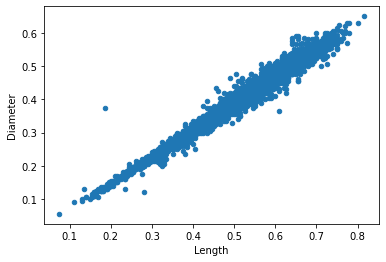

In [263]:
df.plot(kind='scatter', x='Length', y='Diameter')

- When we look at the above scatter plot, we see that there is an almost linear relation between Length and Diameter.

- Let's use boxplot this time to see the relation between sex and rings:

Text(0, 0.5, 'Number of Rings')

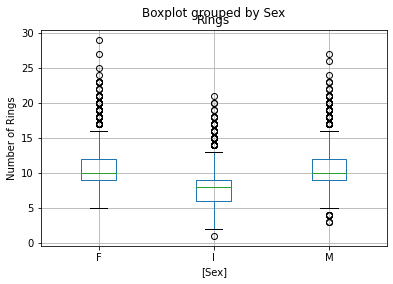

In [264]:
ax = df[['Rings', 'Sex']].boxplot(by='Sex')
ax.set_ylabel('Number of Rings')

- Or we can see the boxplot of every feature:

Length               AxesSubplot(0.125,0.536818;0.133621x0.343182)
Diameter          AxesSubplot(0.285345,0.536818;0.133621x0.343182)
Height             AxesSubplot(0.44569,0.536818;0.133621x0.343182)
Whole weight      AxesSubplot(0.606034,0.536818;0.133621x0.343182)
Shucked weight    AxesSubplot(0.766379,0.536818;0.133621x0.343182)
Viscera weight          AxesSubplot(0.125,0.125;0.133621x0.343182)
Shell weight         AxesSubplot(0.285345,0.125;0.133621x0.343182)
Rings                 AxesSubplot(0.44569,0.125;0.133621x0.343182)
target_class         AxesSubplot(0.606034,0.125;0.133621x0.343182)
dtype: object

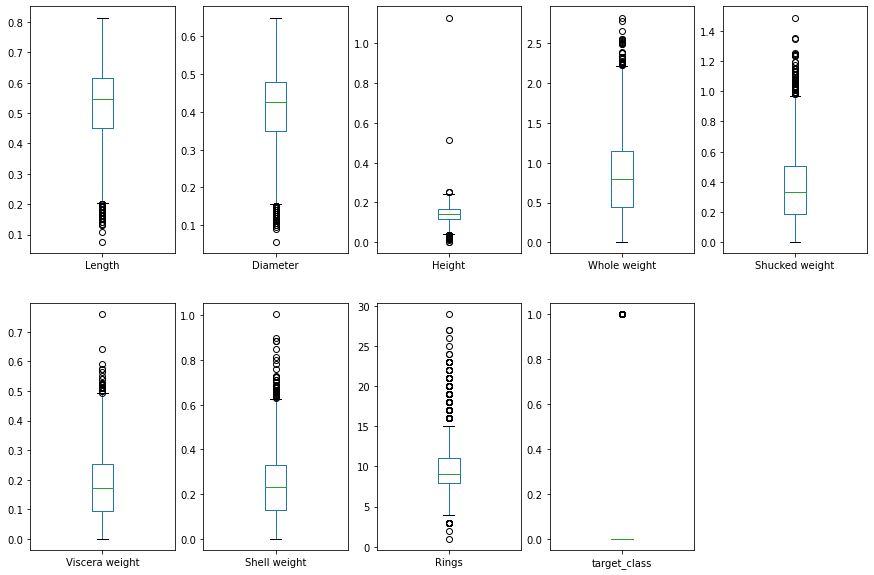

In [265]:
boxplots_cols = ["Sex","Length", "Diameter", "Height","Whole weight", "Shucked weight", "Viscera weight","Shell weight","Rings","target_class"]
df[boxplots_cols].plot(kind='box', subplots=True, layout=(2,5), figsize=(15, 10))

array([[<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>],
       [<AxesSubplot:title={'center':'Whole weight'}>,
        <AxesSubplot:title={'center':'Shucked weight'}>,
        <AxesSubplot:title={'center':'Viscera weight'}>],
       [<AxesSubplot:title={'center':'Shell weight'}>,
        <AxesSubplot:title={'center':'Rings'}>,
        <AxesSubplot:title={'center':'target_class'}>]], dtype=object)

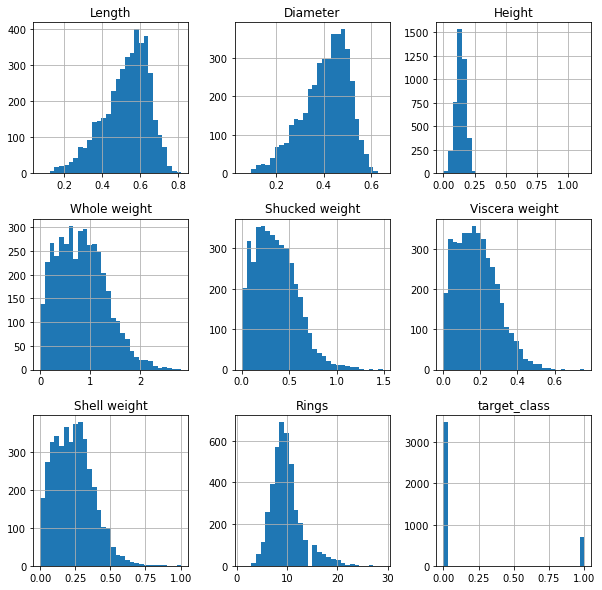

In [266]:
df.hist(bins=30,layout=(3,3), figsize=(10, 10))

- Except the target class, the boxplots seem good and interpratable. The target_class's boxplot does not give many informantion beacuse there are 2 classes(0 and 1).

# PART-2: Classification

## 2.1 TRAIN-TEST SPLIT


Now it is time to prepare out data to training and testing. To do that we import many things:



In [267]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

In [268]:
#Let us see the dataFrame again:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,target_class
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,0


- We remove the Rings feature from the dataFrame because we determined the target_class according to the number of rings.
So if we traint he classifiers with the 'Rings' feature, it would be cheating and unfair, and easy to classify.

In [269]:

#df_removed = df.drop('Rings', axis=1)
#df_removed.head()

#X will be our training and testing dataset
X = df.drop(['target_class','Rings'], axis=1)
#y will be the corresponding class labels
y = df['target_class']
X.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120


- Shuffling data serves the purpose of reducing variance and making sure that models remain general and overfit less.So let's shuffle the dataset to break the orderness:

In [270]:
X, y = shuffle(X, y)

- Split the dataset as training(70%) and testing(30%):

In [271]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=0)
X_train.shape, X_test.shape

((2923, 8), (1253, 8))

In [272]:
#Check the data types of the features:
X_train.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
dtype: object

In [273]:
X_train.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
2010,M,0.450,0.330,0.105,0.4955,0.2575,0.0820,0.1290
1067,I,0.370,0.280,0.100,0.2210,0.1165,0.0265,0.0635
3434,I,0.375,0.285,0.090,0.2570,0.1045,0.0620,0.0750
2770,F,0.575,0.435,0.155,0.8975,0.4115,0.2325,0.2300
2821,I,0.450,0.335,0.105,0.3620,0.1575,0.0795,0.1095


- The 'Sex' feature does not have a numeric type. We need to convert it to a numeric type to use it in the ML classification model. Otherwise we are getting error:

In [274]:
#To make it numeric, we use OrdinalEncoder function in sklearn:
encoder = ce.OrdinalEncoder(cols=['Sex'])

- I needed to install it first:

In [275]:
#!pip install category-encoders

- Now we use the fit_transform in out training dataset to learn the parameters.
The fit method is calculating the mean and variance of each of the features present in our data. 
The transform method is transforming all the features using the respective mean and variance.

- Using the transform method we can use the same mean and variance as it is calculated from our training data to transform our test data. 
Thus, the parameters learned by our model using the training data will help us to transform our test data.

- If we will use the fit method on our test data too, we will compute a new mean and variance that is a new scale for each feature and will let our model learn about our test data too. Thus, what we want to keep as a surprise is no longer unknown to our model and we will not get a good estimate of how our model is performing on the test 
(unseen) data which is the ultimate goal of building a model using machine learning algorithm.

In [276]:
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [277]:
#We see that 'Sex' feature has new numeric values.
X_train.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
2010,1,0.450,0.330,0.105,0.4955,0.2575,0.0820,0.1290
1067,2,0.370,0.280,0.100,0.2210,0.1165,0.0265,0.0635
3434,2,0.375,0.285,0.090,0.2570,0.1045,0.0620,0.0750
2770,3,0.575,0.435,0.155,0.8975,0.4115,0.2325,0.2300
2821,2,0.450,0.335,0.105,0.3620,0.1575,0.0795,0.1095


In [278]:
#Also in testing set.
X_test.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
1148,3,0.580,0.450,0.155,0.9300,0.3850,0.246,0.265
2596,3,0.600,0.460,0.150,1.2350,0.6025,0.274,0.290
2767,2,0.560,0.435,0.135,0.7200,0.3290,0.103,0.251
2129,1,0.585,0.455,0.140,0.9700,0.4620,0.185,0.295
2633,2,0.425,0.340,0.100,0.3515,0.1625,0.082,0.094


In [279]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 2.2 - DECISION TREE 

Define a Decision Tree classifier model. Max depth is a hyper-parameter. We can try different values to reach the best accuracy.

In [280]:
clf = DecisionTreeClassifier(max_depth=5, random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

- Predict the testing set and training set:

In [281]:
#If you want you can visualize the decision tree:
'''
plt.figure(figsize=(12,8))
tree.plot_tree(clf.fit(X_train, y_train))
'''

'\nplt.figure(figsize=(12,8))\ntree.plot_tree(clf.fit(X_train, y_train))\n'

In [282]:
y_pred_test = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

acc_training = accuracy_score(y_train, y_pred_train)
acc_testing = accuracy_score(y_test, y_pred_test)
print('Training accuracy score : {0:0.4f}'.format(acc_training))
print('Testing accuracy score: {0:0.4f}'.format(acc_testing))

Training accuracy score : 0.8755
Testing accuracy score: 0.8795


In [283]:
#Let's see the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
conf_matrix

array([[1019,   53],
       [  98,   83]])

In [284]:
#Let's see the calssification report:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1072
           1       0.61      0.46      0.52       181

    accuracy                           0.88      1253
   macro avg       0.76      0.70      0.73      1253
weighted avg       0.87      0.88      0.87      1253



### RESULT:

We get 0.85 testing accuracy in Desicion Tree Classifier.(Of course the result can vary because we are randomly selecting the train and test splits. However, I did the experiments many times and see that the accuracy result will be between [0.84, 0.87] range in all the classifiers (Decision Tree, KNearest Neighbors, SVC, Logistic Regression, KMeans, and Random Forest below).

## 2.3 - KNEAREST NEIGHBORS

- Define KNearest Neighbors classifier and try different k-values in the range (0,20). (k is a hyper-parameter):

In [285]:
from sklearn.neighbors import KNeighborsClassifier

k_range = range(1,20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
    
#print(scores)
print("max score = ",max(scores))
k_max = scores.index(max(scores))
print("k = ", k_max)
print("max score validation = ",scores[k_max])

max score =  0.8802873104549083
k =  6
max score validation =  0.8802873104549083


- The maximum score in KNearest Neighbor algrithm is 0.85 with k=17

## 2.4 - SVC

- Define a SV Classifier:

In [286]:
from sklearn.svm import SVC

svm = SVC().fit(X_train, y_train)

print("Training score = ",svm.score(X_train, y_train))
print("Testing score = ",svm.score(X_test, y_test))

Training score =  0.8518645227505987
Testing score =  0.8723064644852354


In [287]:
#Let's see the calssification report:
y_pred_test = svm.predict(X_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1072
           1       0.77      0.17      0.27       181

    accuracy                           0.87      1253
   macro avg       0.82      0.58      0.60      1253
weighted avg       0.86      0.87      0.84      1253



## 2.5 - LOGISTIC REGRESSION

- Define a logistic regression classifier:

In [288]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print("Training score = ",logreg.score(X_train, y_train))
print("Testing score = ",logreg.score(X_test, y_test))

Training score =  0.8436537803626412
Testing score =  0.8723064644852354


In [289]:
#Let's see the calssification report:
y_pred_test = logreg.predict(X_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1072
           1       0.78      0.16      0.27       181

    accuracy                           0.87      1253
   macro avg       0.83      0.58      0.60      1253
weighted avg       0.86      0.87      0.83      1253



## 2.6 - KMEANS

- Define Kmeans classifier with k=2. Here k is a hyper-parameter. We make k equal 2 because we have 2 classes:

In [290]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)
y_kmeans = kmeans.predict(X_test)
acc_testing = accuracy_score(y_test, y_kmeans)

print("Testing score = ",acc_testing)

Testing score =  0.3136472466081405


In [291]:
#Let's see the calssification report:

print(classification_report(y_test, y_kmeans))

              precision    recall  f1-score   support

           0       0.78      0.28      0.41      1072
           1       0.11      0.52      0.18       181

    accuracy                           0.31      1253
   macro avg       0.44      0.40      0.30      1253
weighted avg       0.68      0.31      0.38      1253



## 2.7 - RANDOM FOREST

- Define random forest classifier with max depth is 3. Here max_depth is a hyper-parameter.

In [292]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf_rand_forest = RandomForestClassifier(max_depth=3, random_state=0)
clf_rand_forest.fit(X_train, y_train)

y_pred=clf_rand_forest.predict(X_test)
acc_testing = accuracy_score(y_test, y_pred)

print("Testing score = ", acc_testing)

Testing score =  0.8563447725458898


In [293]:
#Let's see the calssification report:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1072
           1       0.67      0.01      0.02       181

    accuracy                           0.86      1253
   macro avg       0.76      0.51      0.47      1253
weighted avg       0.83      0.86      0.79      1253



## 2.8 - PCA

- Now, let's try something different. We apply PCA to our training and testing datasets to rduce the dimension. Let's hope PCA will increare the testing accuracy:

In [294]:
from sklearn.decomposition import PCA
pca = PCA(.95)
pca.fit(X_train)
print("The number of components = ",pca.n_components_)

The number of components =  2


In [295]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [296]:
X_train_pca.shape

(2923, 2)

- To test the PCA, I use logistic regression classifier:

In [297]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver = 'lbfgs')
logreg.fit(X_train_pca, y_train)
print("Test accuracy = ",logreg.score(X_test_pca, y_test))

Test accuracy =  0.8491620111731844


- Unfortunately, PCA didn't change the accuracy. It is still in the range [0,84, 0.87].

- Untill this point we tried 6 classifiers: 

  1. Decision Tree
  2. KNearest Neighbors
  3. SVC
  4. Logistic Regression
  5. KMeans
  6. Random Forest

However, their accuracy reslts on testing set were similar (in the range [0.83, 0.87]).
Therefore I couldn't decide which classifier is the best. The last thing we can do is to use cross-validatin:

## 2.9 - Cross Validation

- I will try three types of cross-validation in sklearn:

  1. Stratified KFold
  2. Shuffle Split
  3. KFold

- Since the accuracy results were similar in the six classifier, I will just choose 2 of them in cross-validation experiments:
    Random Forest and SVC.

In [298]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold, ShuffleSplit

#SVC
#
#print(X_train.shape,y_train.shape)
print()
cv1 = StratifiedKFold(n_splits=5)
cv2 = ShuffleSplit(n_splits=5, test_size=.3)
cv3 = KFold(n_splits=5, shuffle=True)

print("SVC cross-validation results:")
scores1 = cross_val_score(svm, X_train, y_train, cv=cv1)
print("Stratified KFold accuracy = ",np.mean(scores1))

scores2 = cross_val_score(svm, X_train, y_train, cv=cv2)
print("Shuffle Split accuracy = ",np.mean(scores2))

scores3 = cross_val_score(svm, X_train, y_train, cv=cv3)
print("KFold accuracy = ",np.mean(scores3))



#RANDOM FOREST
#
#print(X_train.shape,y_train.shape)
print()
cv1 = StratifiedKFold(n_splits=5)
cv2 = ShuffleSplit(n_splits=5, test_size=.3)
cv3 = KFold(n_splits=5, shuffle=True)

print("RANDOM FOREST cross-validation results:")
scores1 = cross_val_score(clf_rand_forest, X_train, y_train, cv=cv1)
print("Stratified KFold accuracy = ",np.mean(scores1))

scores2 = cross_val_score(clf_rand_forest, X_train, y_train, cv=cv2)
print("Shuffle Split accuracy = ",np.mean(scores2))

scores3 = cross_val_score(clf_rand_forest, X_train, y_train, cv=cv3)
print("KFold accuracy = ",np.mean(scores3))


SVC cross-validation results:
Stratified KFold accuracy =  0.8460484720758693
Shuffle Split accuracy =  0.8403648802736603
KFold accuracy =  0.8422989111345276

RANDOM FOREST cross-validation results:
Stratified KFold accuracy =  0.826205362369746
Shuffle Split accuracy =  0.8228050171037629
KFold accuracy =  0.8275693712680013


- The SVC results(0.856, 0.843, 0.854) are better than Random Forest classifier results(0,829, 0.837, 0.829).
- However, the results could be different because cross-validation is randomly dividing the dataset. So, there is a random process.

- Cross-validation couldn't increase the classification results and it is still in the range [0,83, 0.87] in each experiment.

# 3 - OVERALL RESULT


- With ABALONE Dataset first we did some data exploration, then we use six classifier to correctly classify data such as:

  1. Decision Tree
  2. KNearest Neighbors
  3. SVC
  4. Logistic Regression
  5. KMeans
  6. Random Forest

All the six classifiers gave the similar accuracy results on testing data in the range[0.83, 0.87]. I also tried some hyper-parameter tunning but results didn't change that much.

- To increase the results, I tried PCA to reduce the dimension. However it didn't increase the accuracy.

- Another technique was using cross-validation, but it also couldn't increase the result.

- The reasons for this problem could be:

  1. The dataset is unbalanced. The dataset has 3484 samples for class 0 (young snails) and 692 samples for class 1 (old snails). So, class 1 is under-represented.
  2. The size of the dataset is not big enough. There are 4176 samples in total.